Alyssa Weber
DSC 650
Week 5

# 5.1 - Movie Review Classifier

Deep Learning with Python: Section 3.4, pg 68-77

In [1]:
# import the movie review dataset

from keras.datasets import imdb

# only loads the most frequent 10,000 words
# the data sets are loaded as lists
# the labels are loaded as 0- negative and 1- positive
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-07-09 23:37:18.786902: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 23:37:18.911416: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 23:37:18.914305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 23:37:20.326561: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Cannot feed lists into Neural Networks. Use On-hot encoding to change lists into vectors of 0s and 1s

import numpy as np

def vectorize_sequences (sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #sets specific indicies of results[i] to 1's
    return results

x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

In [3]:
# Vectorize labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# Define the model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# Set aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
# Compile and train the model
# note: binary_crossentropy is the usually the best choice when dealing with output probabilities

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5386 - acc: 0.7803 - val_loss: 0.4423 - val_acc: 0.8329
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3434 - acc: 0.8897 - val_loss: 0.3243 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2566 - acc: 0.9129 - val_loss: 0.2888 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2077 - acc: 0.9297 - val_loss: 0.2765 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1719 - acc: 0.9425 - val_loss: 0.2945 - val_acc: 0.8824
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1497 - acc: 0.9511 - val_loss: 0.2885 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1292 - acc: 0.9585 - val_loss: 0.2908 - val_acc: 0.8861
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1116 - a

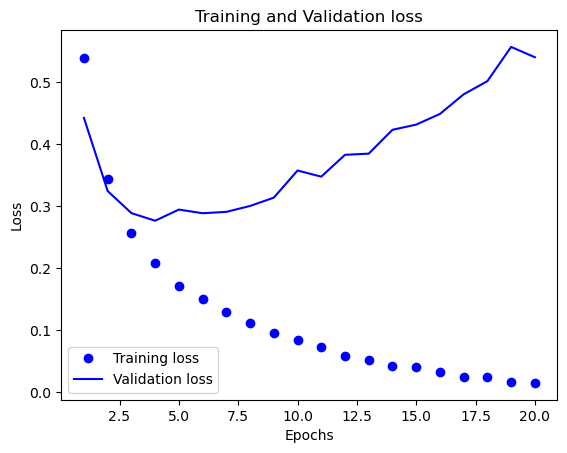

In [7]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') #'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') #'b' is for solid blue line
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

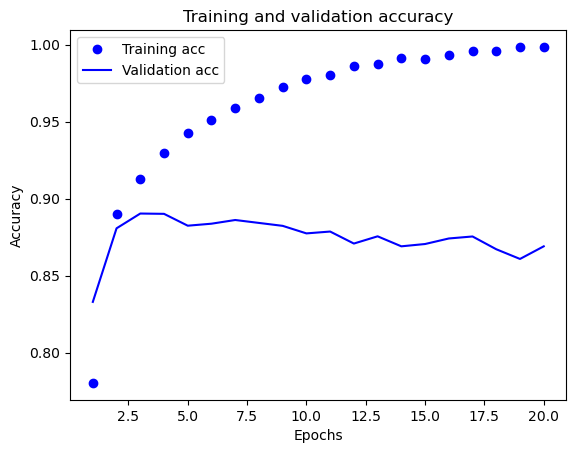

In [8]:
# Plot the taining and validation accuracy

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [9]:
# Retrain a new model from scratch

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4534 - accuracy: 0.8113
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2630 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2089 - accuracy: 0.9238
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3023 - accuracy: 0.8795


[0.3023304045200348, 0.8795199990272522]

note: Achieves an accuracy of about 88%

# 5.2 - News Classifier

Deep Learning with Python: Section 3.5, pg 78-84

In [10]:
# Import the news classsifier dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [11]:
# Encode the data

import numpy as np

def vectorize_sequences (sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #sets specific indicies of results[i] to 1's
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
# Define the model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# Compile the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# set aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# Train the model

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 2.6985 - accuracy: 0.4587 - val_loss: 1.8259 - val_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.5458 - accuracy: 0.6733 - val_loss: 1.4098 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.2013 - accuracy: 0.7339 - val_loss: 1.2351 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.9905 - accuracy: 0.7828 - val_loss: 1.1110 - val_accuracy: 0.7450
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8275 - accuracy: 0.8172 - val_loss: 1.0454 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6919 - accuracy: 0.8500 - val_loss: 0.9787 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5823 - accuracy: 0.8755 - val_loss: 0.9512 - val_accuracy: 0.7990
Epoch 8/20
16

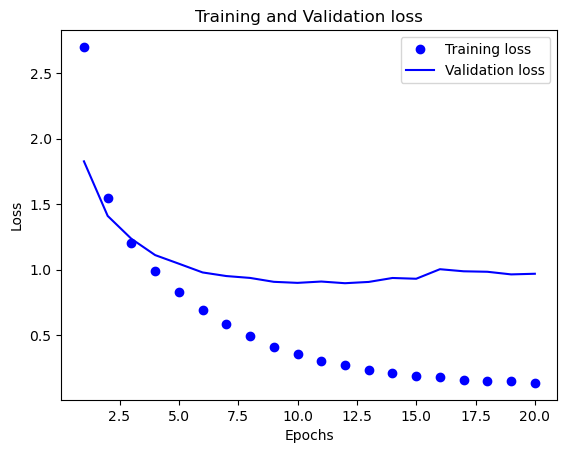

In [16]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') #'bo' is for blue dot
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') #'b' is for solid blue line
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

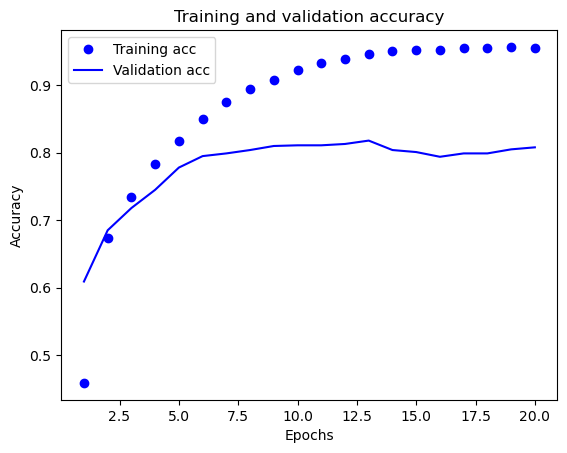

In [17]:
# Plot the training and validation accuracy

plt.clf() #clears the figure

acc = history.history['accuracy'] #note: used 'accuracy' instead of 'acc' as shown in the text
val_acc = history.history['val_accuracy'] #note: used 'val_accuracy' instead of 'val_acc' as shown in the text

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

note: The text says that it peaks after 9 epochs, however, this round of modeling seems to peak later. I will continue to use 9 as suggested by the text. 

In [18]:
# Retrain a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.7251 - accuracy: 0.4880 - val_loss: 1.8092 - val_accuracy: 0.6250
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.5366 - accuracy: 0.6842 - val_loss: 1.3856 - val_accuracy: 0.6830
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.1842 - accuracy: 0.7433 - val_loss: 1.2007 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.9779 - accuracy: 0.7918 - val_loss: 1.1277 - val_accuracy: 0.7640
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.8098 - accuracy: 0.8309 - val_loss: 1.0412 - val_accuracy: 0.7710
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6726 - accuracy: 0.8578 - val_loss: 0.9899 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.5635 - accuracy: 0.8837 - val_loss: 0.9294 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===

[0.965984582901001, 0.7858415246009827]

The accuracy of this model is just above 78%

# 5.3 - Housing Price Regression Model

Deep Learning with Python: Section 3.6, pg 85-91

In [34]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [35]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [36]:
# Define the model

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [37]:
# K-fold validation

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [38]:
# print scores
all_scores

[1.8084664344787598, 2.2307748794555664, 2.705993890762329, 2.4515841007232666]

In [39]:
# print mean of the scores
np.mean(all_scores)

2.2992048263549805

note: the average validation score was 2.3, meaning that we're off by $2,300. 

In [42]:
# Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets), 
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae'] #note: used 'val_mae' rather than 'val_mean_absuolute_error' as indicated in the text
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
# Build the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

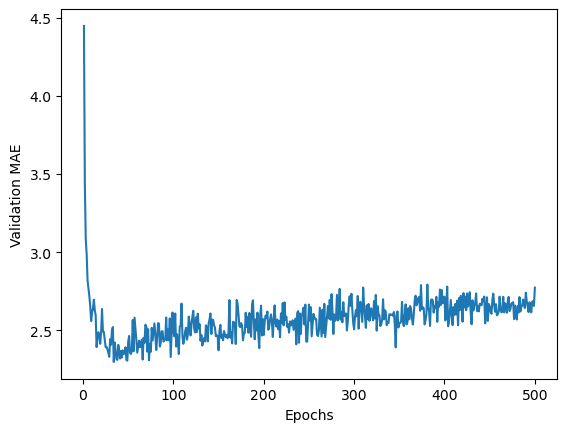

In [45]:
# Plot validation scores

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

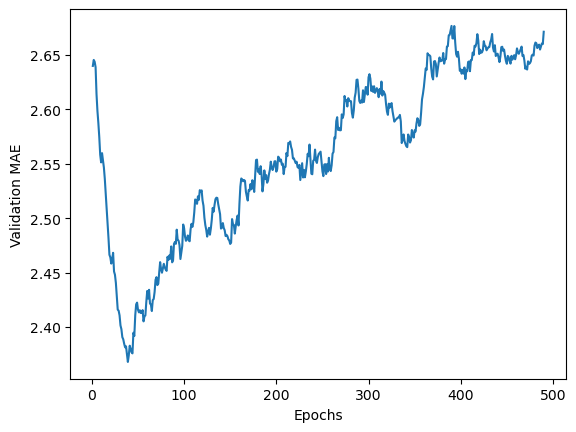

In [46]:
# plot the validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

note: In the text the graph shos that that the MAE stops improving significantly after 80 epochs. My graph looks closer to 40 or 50. I will continue with the text's example of 80. 

In [47]:
# Train the final model

model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 17.0829 - mae: 2.5729


2.5729193687438965

This model is off by about $2,570, which is slightly worse than the average I had previously. I'm going to shy away from the text and run the model one more time at 45 epochs. 

In [48]:
# NOT IN TEXT
# Testing the model at 45 epochs instead of 80 based on the results my graph showed.

model = build_model()
model.fit(train_data, train_targets,
          epochs=45, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 21.8970 - mae: 2.8650


2.8650147914886475

note: This was not an improvement. 